In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
pip install openpyx1

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement openpyx1 (from versions: none)
ERROR: No matching distribution found for openpyx1


In [3]:
df = pd.read_excel("HotelFinalDataset.xlsx")

In [4]:
df.head()

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam


In [5]:
df.shape

(525, 9)

In [6]:
#checking for null values in any of the feartures

df.isna().any()

Unnamed: 0      False
Name            False
Place           False
Type            False
Price           False
ReviewsCount     True
Rating           True
City            False
State            True
dtype: bool

In [ ]:
#this shows there is there is null value in Reviews,rating,state

<AxesSubplot:>

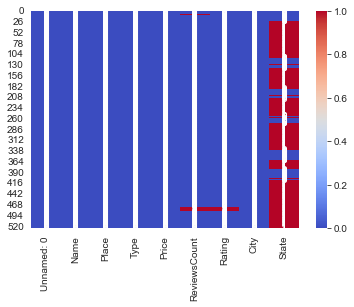

In [7]:
#placing them on a heatmap to denote the results

sns.heatmap(df.isna(),annot= True,cmap = 'coolwarm')

In [8]:
#next step is to get the count of null values

df.isna().sum()

Unnamed: 0        0
Name              0
Place             0
Type              0
Price             0
ReviewsCount     13
Rating           10
City              0
State           392
dtype: int64

In [12]:
#calculating the percentage of the Null vales
missing_val = pd.DataFrame({'Missing_values_percentage':(df.isna().sum()/len(df.isna()))*100})

#presenting them in dataframe
missing_val.style.highlight_max(color='Green').highlight_min(color='red')



#missing_val






,Missing_values_percentage
Unnamed: 0,0.000000
Name,0.000000
Place,0.000000
Type,0.000000
Price,0.000000
ReviewsCount,2.476190
Rating,1.904762
City,0.000000
State,74.666667


In [ ]:
#the above diagram shows howmuch null data is present in each section 

In [13]:
#now getting the info of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    525 non-null    int64  
 1   Name          525 non-null    object 
 2   Place         525 non-null    object 
 3   Type          525 non-null    object 
 4   Price         525 non-null    object 
 5   ReviewsCount  512 non-null    float64
 6   Rating        515 non-null    float64
 7   City          525 non-null    object 
 8   State         133 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.0+ KB


In [14]:
#dropping the null values

df.dropna(axis=0,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 407
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    132 non-null    int64  
 1   Name          132 non-null    object 
 2   Place         132 non-null    object 
 3   Type          132 non-null    object 
 4   Price         132 non-null    object 
 5   ReviewsCount  132 non-null    float64
 6   Rating        132 non-null    float64
 7   City          132 non-null    object 
 8   State         132 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.3+ KB


In [16]:
df.shape

(132, 9)

In [17]:
df.head()

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam


In [18]:
#getting rid of the unnamed column

df.drop(columns="Unnamed: 0",inplace=True)

In [19]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam


In [23]:
#applying feature engineering to check how much unique values are presnt in each feature sets
# to showcase anything in a dataframe we present them as pd.Datframe(dictiioinary)

unique_val= pd.DataFrame({"Unique_values":df.nunique()})
unique_val

,Unique_values
Name,132
Place,29
Type,84
Price,124
ReviewsCount,72
Rating,25
City,29
State,6


In [24]:
#getting to know the data types
df.dtypes

Name             object
Place            object
Type             object
Price            object
ReviewsCount    float64
Rating          float64
City             object
State            object
dtype: object

In [25]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam


In [26]:
#here the price column is as object we are changing it to integer


df["Price"]

0       ₹ 7,887
1      ₹ 15,267
2      ₹ 13,063
3      ₹ 12,854
4       ₹ 9,471
         ...   
402     ₹ 9,552
403     ₹ 9,079
404     ₹ 9,797
406    ₹ 10,836
407    ₹ 11,430
Name: Price, Length: 132, dtype: object

In [30]:
df['Price']= df["Price"].str.replace('₹','')
df['Price']= df["Price"].str.replace('','')
df['Price']= df["Price"].str.replace(',','')
df['Price']= df["Price"].astype(int)

#this entire step is to replace the value type of price by getting rid of rupee sign and space

In [31]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,7887,778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,15267,500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,13063,1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,12854,500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,9471,500.0,8.8,Zuideramstel,Amsterdam


In [32]:
df.dtypes

Name             object
Place            object
Type             object
Price             int32
ReviewsCount    float64
Rating          float64
City             object
State            object
dtype: object

<AxesSubplot:>

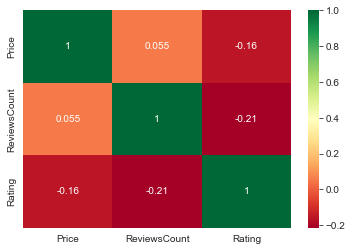

In [34]:
#checking the correlation among the continous variables in the dataframe
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

#cmap is the color code many can be put like coolwarm ,rdylGn

In [43]:
#performing a value count in the features
#the functgion we use is value_counts

value_count = pd.DataFrame({'City_valuecount':df['City'].value_counts()})
value_count

#presenting the value count with a heatmap colouring scheme
value_count.style.background_gradient(cmap='RdYlGn')

,City_valuecount
City Centre,19
The Hague City Centre,18
Eindhoven City Centre,16
Centrum,14
Amsterdam City Center,11
Feijenoord,8
Wijck,7
Zuideramstel,5
Strijp,5
Oud Zuid,4


In [45]:
#doing the value count for state
value_count1 = pd.DataFrame({'state_valuecount':df['State'].value_counts()})
value_count1

#presenting it with a heatmap
value_count1.style.background_gradient(cmap='coolwarm')


,state_valuecount
Rotterdam,25
Amsterdam,24
Eindhoven,24
Utrecht,23
The Hague,21
Maastricht,15


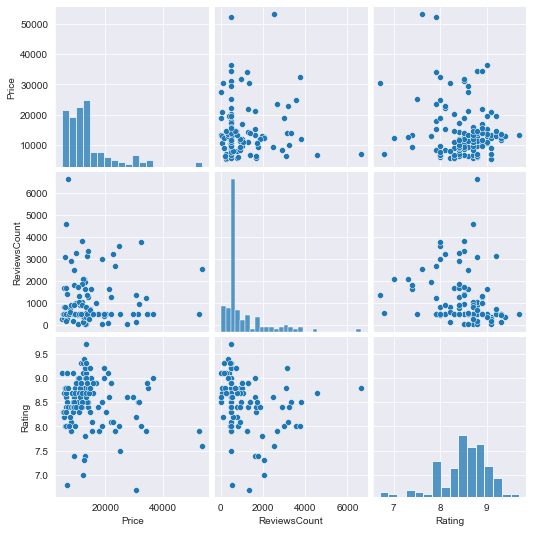

In [46]:
#plotting a pairplot among the variables

sns.pairplot(df)

ValueError: Could not interpret value `State` for parameter `hue`

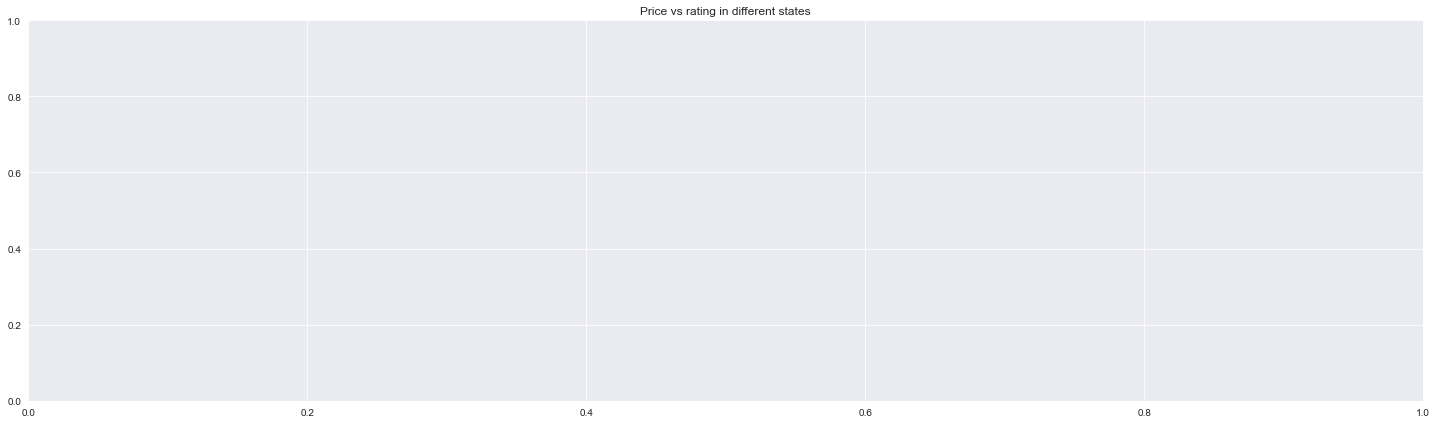

In [72]:
#data analysis in details

#plotting a scatter plot among price vs rating in different state

plt.figure(figsize=(25,7))
plt.title("Price vs rating in different states")
#colors= {"Rotterdam":"red","Amsterdam":"Orange","Eindhoven":"Green","Utrecht":"Yellow","The Hague":"Black","Maastricht":"blue"}

sns.scatterplot(x=df['Price'],y=df['Rating'],df=df,hue="State")
#plt.legend(["Rotterdam","Amsterdam","Eindhoven","Utrecht","The Hague","Maastricht"])
#plt.show()


<AxesSubplot:xlabel='State', ylabel='Price'>

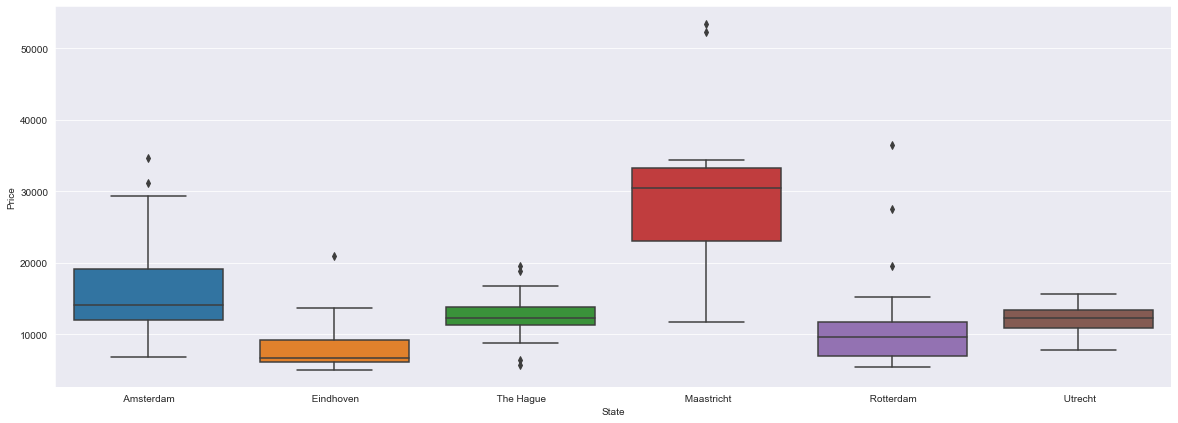

In [74]:
#creationg a boxplot between state and price
plt.figure(figsize=(20,7))
sns.boxplot(x=df['State'],y=df['Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Amsterdam Noord'),
  Text(1, 0, 'Amsterdam City Center'),
  Text(2, 0, 'Zuideramstel'),
  Text(3, 0, 'Oud Zuid'),
  Text(4, 0, 'Oost'),
  Text(5, 0, 'Oud West'),
  Text(6, 0, 'Strijp'),
  Text(7, 0, 'Eindhoven City Centre'),
  Text(8, 0, 'Stratum'),
  Text(9, 0, 'Woensel-Zuid'),
  Text(10, 0, 'Tongelre'),
  Text(11, 0, 'The Hague City Centre'),
  Text(12, 0, 'Laak'),
  Text(13, 0, 'Haagse Hout'),
  Text(14, 0, 'Segbroek'),
  Text(15, 0, 'Wijck'),
  Text(16, 0, 'Jekerkwartier'),
  Text(17, 0, 'Maastricht City Centre'),
  Text(18, 0, 'Boschstraatkwartier'),
  Text(19, 0, 'Randwijck'),
  Text(20, 0, 'Delfshaven'),
  Text(21, 0, 'Centrum'),
  Text(22, 0, 'Feijenoord'),
  Text(23, 0, 'Kralingen-Crooswijk'),
  Text(24, 0, 'City Centre'),
  Text(25, 0, 'Zuidwest'),
  Text(26, 0, 'West'),
  Text(27, 0, 'Zuid'),
  Text(28, 0, 'Noordoost')])

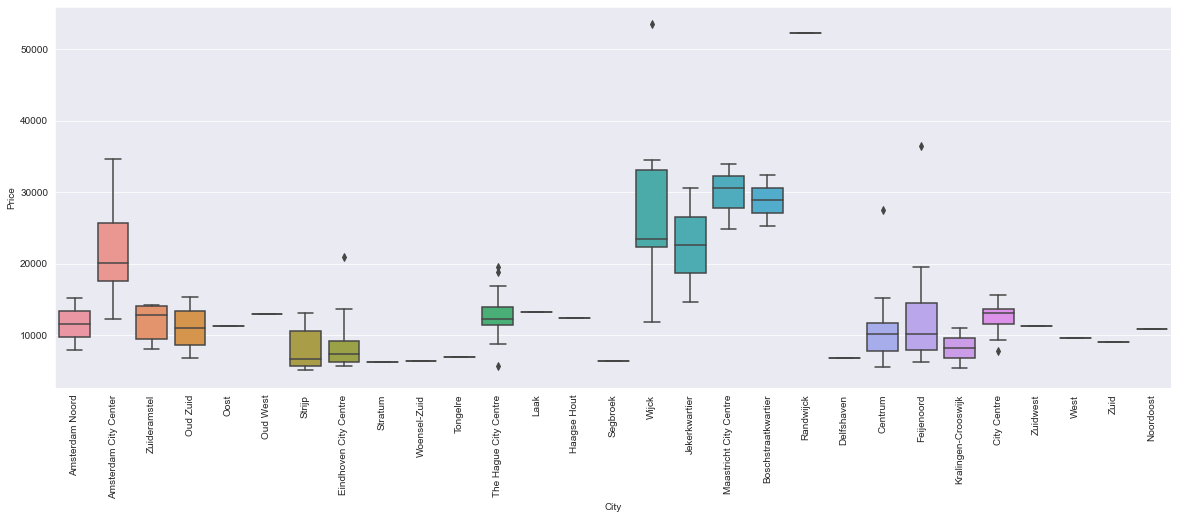

In [75]:
#creating a boxplot for city vs prices
plt.figure(figsize=(20,7))
sns.boxplot(x=df['City'],y=df['Price'])
plt.xticks(rotation=90)


<AxesSubplot:>

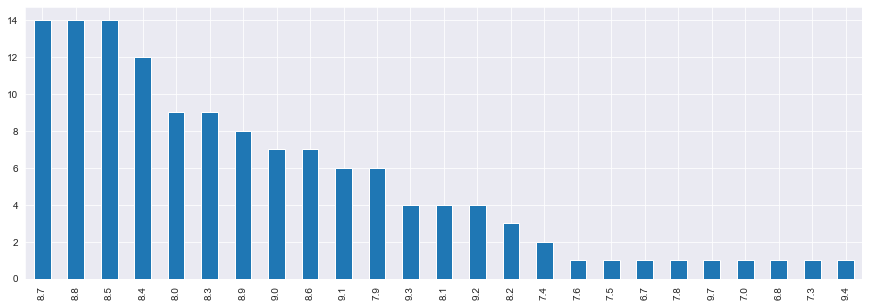

In [77]:
#plotting a histogram for ratings



plt.figure(figsize=(15,5))
df["Rating"].value_counts().plot(kind='bar')

H:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Amsterdam Noord'),
  Text(1, 0, 'Amsterdam City Center'),
  Text(2, 0, 'Zuideramstel'),
  Text(3, 0, 'Oud Zuid'),
  Text(4, 0, 'Oost'),
  Text(5, 0, 'Oud West'),
  Text(6, 0, 'Strijp'),
  Text(7, 0, 'Eindhoven City Centre'),
  Text(8, 0, 'Stratum'),
  Text(9, 0, 'Woensel-Zuid'),
  Text(10, 0, 'Tongelre'),
  Text(11, 0, 'The Hague City Centre'),
  Text(12, 0, 'Laak'),
  Text(13, 0, 'Haagse Hout'),
  Text(14, 0, 'Segbroek'),
  Text(15, 0, 'Wijck'),
  Text(16, 0, 'Jekerkwartier'),
  Text(17, 0, 'Maastricht City Centre'),
  Text(18, 0, 'Boschstraatkwartier'),
  Text(19, 0, 'Randwijck'),
  Text(20, 0, 'Delfshaven'),
  Text(21, 0, 'Centrum'),
  Text(22, 0, 'Feijenoord'),
  Text(23, 0, 'Kralingen-Crooswijk'),
  Text(24, 0, 'City Centre'),
  Text(25, 0, 'Zuidwest'),
  Text(26, 0, 'West'),
  Text(27, 0, 'Zuid'),
  Text(28, 0, 'Noordoost')])

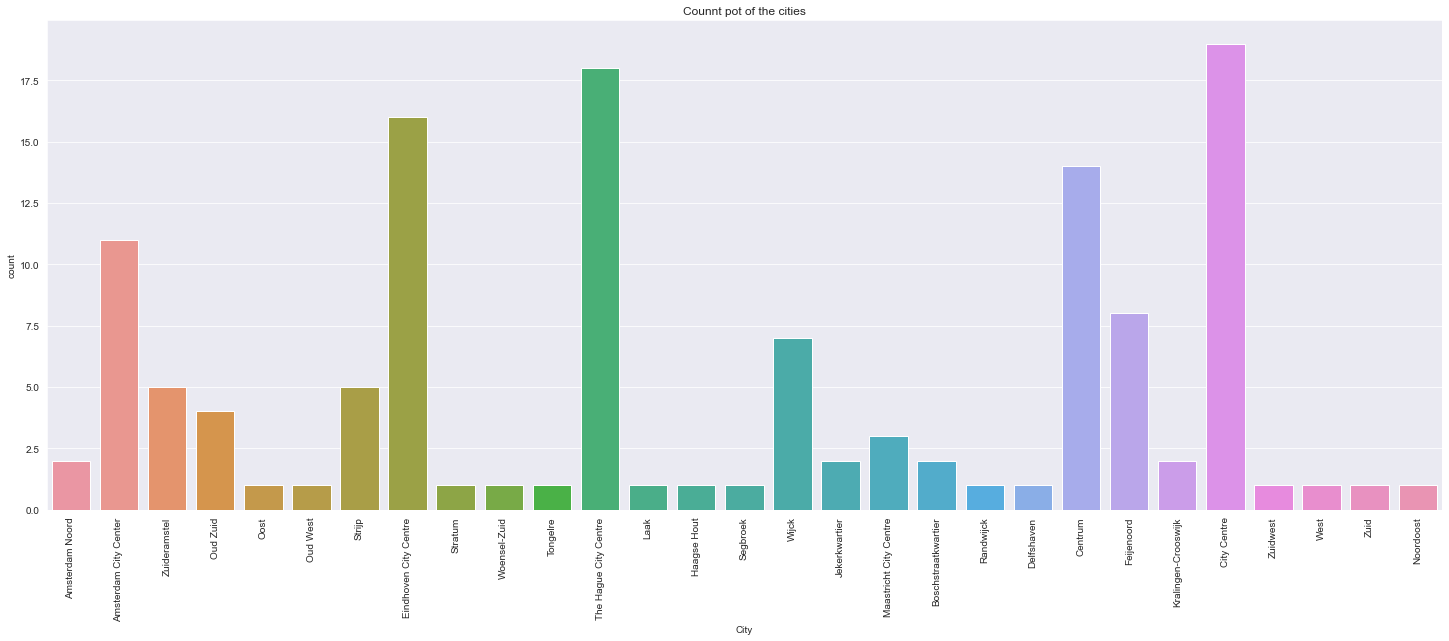

In [80]:
#doing a countplot in the ratings of the hotels in respected cities

plt.figure(figsize=(25,9))
plt.title("Counnt pot of the cities")
sns.countplot(df["City"])
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Line graph depicting prices vs ratings in cities'}, xlabel='Rating', ylabel='Price'>

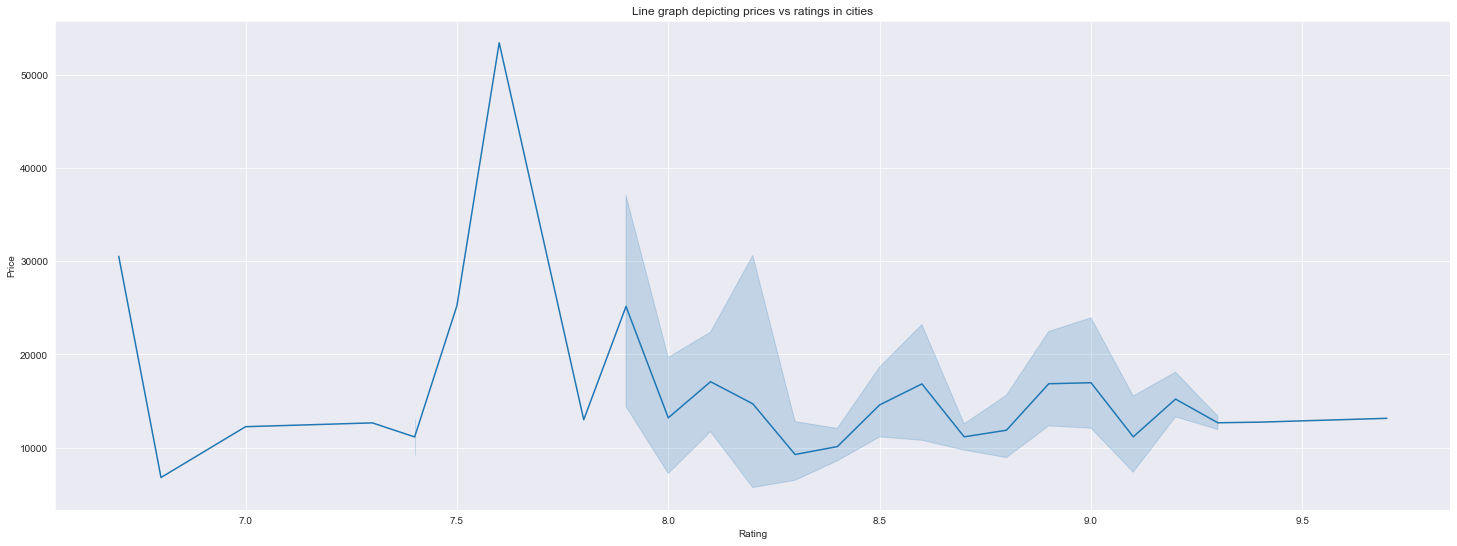

In [83]:
#plotting the line graph of the cities using rating and price

plt.figure(figsize=(25,9))
plt.title("Line graph depicting prices vs ratings in cities")
sns.lineplot(y=df['Price'],x=df["Rating"])

In [85]:
df.head()

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,7887,778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,15267,500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,13063,1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,12854,500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,9471,500.0,8.8,Zuideramstel,Amsterdam


H:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Type', ylabel='count'>

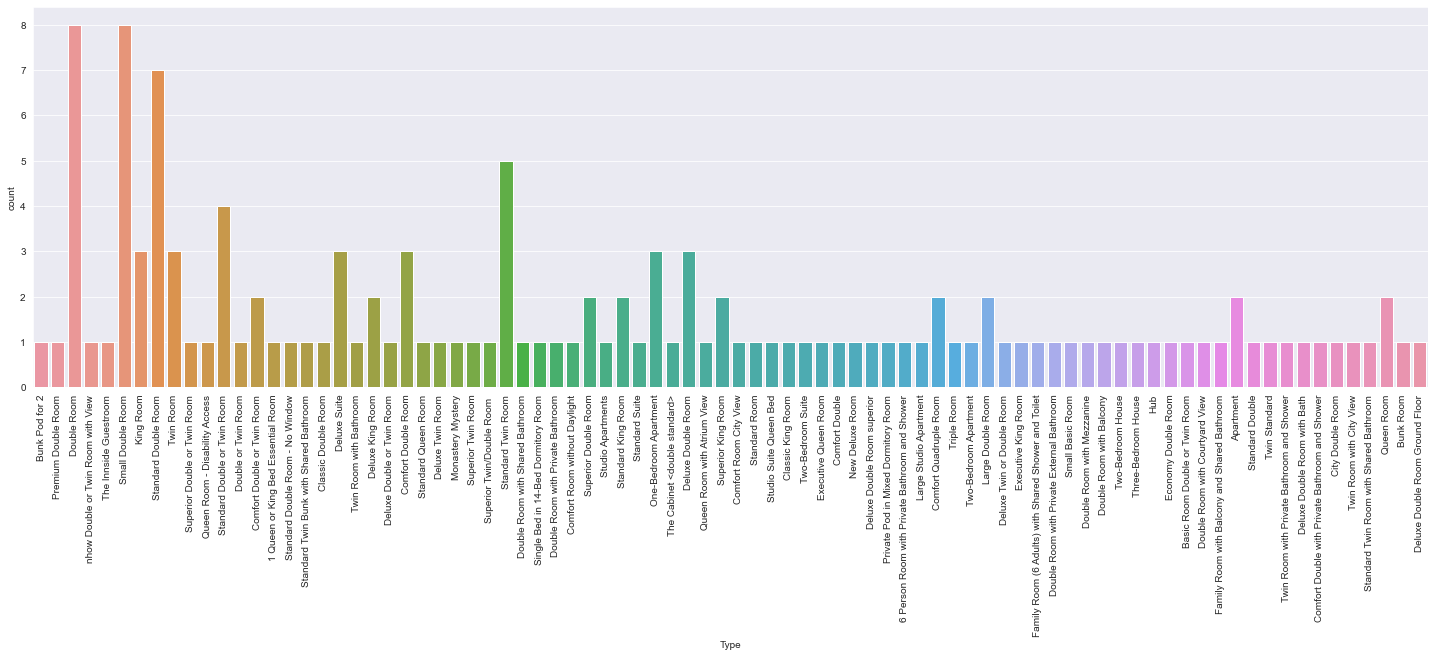

In [86]:
#getiing countplots()
plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
sns.countplot(df["Type"])


In [100]:
#sorting the data frame by rating (ratings grerater than 9)

df1 =df[df["Rating"]>=7].sort_values(by="Rating",ascending=True)
df1

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,12854,500.0,9.0,Zuideramstel,Amsterdam
342,Wikkelboat Nr5 at Floating Rotterdam Rijnhaven,"Feijenoord, Rotterdam",Three-Bedroom House,36489,500.0,9.0,Feijenoord,Rotterdam
340,Sparks Hostel,"Centrum, Rotterdam",Comfort Quadruple Room,15186,1635.0,9.0,Centrum,Rotterdam
338,Suitehotel Pincoffs,"Feijenoord, Rotterdam",Double Room with Mezzanine,10781,500.0,9.0,Feijenoord,Rotterdam
189,COVE Centrum,"The Hague City Centre, The Hague",Studio Apartments,10454,451.0,9.0,The Hague City Centre,The Hague
388,The Nox Hotel,"City Centre, Utrecht",Small Double Room,13471,351.0,9.0,City Centre,Utrecht
194,'t Goude Hooft,"The Hague City Centre, The Hague",Deluxe Suite,19536,375.0,9.0,The Hague City Centre,The Hague
115,Kazerne,"Eindhoven City Centre, Eindhoven",Deluxe King Room,20941,63.0,9.1,Eindhoven City Centre,Eindhoven
191,Hotel Pistache Den Haag,"The Hague City Centre, The Hague",Standard Suite,12093,365.0,9.1,The Hague City Centre,The Hague
114,Eindhoven4you,"Strijp, Eindhoven",Twin Room with Bathroom,5108,234.0,9.1,Strijp,Eindhoven


In [101]:
#sorting the data frame by rating (ratings lesser than 8)


df2 = df[df["Rating"]<7].sort_values(by="Rating",ascending=True)
df2

,Name,Place,Type,Price,ReviewsCount,Rating,City,State
